![Sample Image](wuzzufimages.png)

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('wuzzuf_web_scraping.csv')
df

,Unnamed: 0,job_name,job_link,company_name,company_link,location,job_type,job_time,Country,exp_level,exp_years,skills
0,0,Team leader survey,https://wuzzuf.net/jobs/p/g/L3lJ21pZOzvM-Team-...,Alqotr,https://wuzzuf.net/jobs/careers/Alqotr-Saudi A...,Riyadh,Unknown,Full Time,Saudi Arabia,Not specified,Unknown,IT/Software Development Sales/Retail Engineeri...
1,1,Engineer,https://wuzzuf.net/jobs/p/TxWGjaMwiUTX-Enginee...,Confidential,NaN,Sheikh Zayed,On-site,Full Time,Egypt,Entry Level,1 - 4 Yrs of Exp,Engineering - Construction/Civil/Architecture ...
2,2,Surveyor,https://wuzzuf.net/jobs/p/g/01N6XdmnZBH7-Surve...,Alqotr,https://wuzzuf.net/jobs/careers/Alqotr-Saudi A...,Riyadh,Unknown,Full Time,Saudi Arabia,Not specified,Unknown,Engineering - Construction/Civil/Architecture ...
3,3,Finance,https://wuzzuf.net/jobs/p/kr7GzLIVBA4b-Finance...,International Medical Group,https://wuzzuf.net/jobs/careers/medical-Egypt-...,Mokattam,On-site,Full Time,Egypt,Experienced,1 - 3 Yrs of Exp,Accounting/Finance Accounting Communication sk...
4,4,CAD Draft,https://wuzzuf.net/jobs/p/g/swR0fVQka1A6-CAD-D...,Alqotr,https://wuzzuf.net/jobs/careers/Alqotr-Saudi A...,Riyadh,Unknown,Full Time,Saudi Arabia,Not specified,Unknown,Engineering - Construction/Civil/Architecture ...
...,...,...,...,...,...,...,...,...,...,...,...,...
10723,10723,Hiring English Speakers All over Egypt (Gradua...,https://wuzzuf.net/jobs/p/68Cc24Vd3BAt-Hiring-...,_VOIS Egypt,https://wuzzuf.net/jobs/careers/Vodafone-Egypt...,Cairo,Hybrid,Full Time,Egypt,Entry Level,Unknown,Customer Service/Support Sales/Retail Training...
10724,10724,Executive Secretary,https://wuzzuf.net/jobs/p/RnUPBGZQtYk4-Executi...,Perfect For Agriculture Projects,https://wuzzuf.net/jobs/careers/Perfect For Ag...,Haram,On-site,Full Time,Egypt,Experienced,2 - 3 Yrs of Exp,females_only Administration Customer Service/S...
10725,10725,Senior Infrastructure & Wet Utilities Design E...,https://wuzzuf.net/jobs/p/ASjh1z1D5VvH-Senior-...,Nuthum Elbenaa,https://wuzzuf.net/jobs/careers/Nuthum-Elbenaa...,Mohandessin,On-site,Full Time,Egypt,Experienced,8+ Yrs of Exp,Engineering - Construction/Civil/Architecture ...
10726,10726,Call Center Advisor II B1+ English Speakers (M...,https://wuzzuf.net/jobs/p/g6nqXM21d6H1-Call-Ce...,Etisalat Egypt,https://wuzzuf.net/jobs/careers/Etisalat-Misr-...,Cairo,On-site,Full Time,Egypt,Entry Level,0 - 1 Yrs of Exp,Customer Service/Support English Benefits exce...


## Check  Data

In [3]:
df.shape

(10728, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10728 entries, 0 to 10727
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10728 non-null  int64 
 1   job_name      10728 non-null  object
 2   job_link      10728 non-null  object
 3   company_name  10728 non-null  object
 4   company_link  9639 non-null   object
 5   location      10728 non-null  object
 6   job_type      10728 non-null  object
 7   job_time      10728 non-null  object
 8   Country       10728 non-null  object
 9   exp_level     10728 non-null  object
 10  exp_years     10728 non-null  object
 11  skills        10728 non-null  object
dtypes: int64(1), object(11)
memory usage: 1005.9+ KB


In [5]:
print(df.duplicated().sum())
if df.duplicated().sum()>0:
    df=df.drop_duplicates()

0


In [6]:
df.describe(include=['object'])

,job_name,job_link,company_name,company_link,location,job_type,job_time,Country,exp_level,exp_years,skills
count,10728,10728,10728,9639,10728,10728,10728,10728,10728,10728,10728
unique,6795,10727,3255,3265,252,4,5,30,6,150,9343
top,Accountant,https://wuzzuf.net/jobs/p/LG8EbNYg5D4Z-Financi...,Confidential,https://wuzzuf.net/jobs/careers/Jobs via eFina...,Riyadh,On-site,Full Time,Egypt,Experienced,Unknown,Administration Customer Service/Support Writin...
freq,119,2,1090,59,1199,6836,10350,7694,5886,3050,150


In [7]:
df.head()

,Unnamed: 0,job_name,job_link,company_name,company_link,location,job_type,job_time,Country,exp_level,exp_years,skills
0,0,Team leader survey,https://wuzzuf.net/jobs/p/g/L3lJ21pZOzvM-Team-...,Alqotr,https://wuzzuf.net/jobs/careers/Alqotr-Saudi A...,Riyadh,Unknown,Full Time,Saudi Arabia,Not specified,Unknown,IT/Software Development Sales/Retail Engineeri...
1,1,Engineer,https://wuzzuf.net/jobs/p/TxWGjaMwiUTX-Enginee...,Confidential,NaN,Sheikh Zayed,On-site,Full Time,Egypt,Entry Level,1 - 4 Yrs of Exp,Engineering - Construction/Civil/Architecture ...
2,2,Surveyor,https://wuzzuf.net/jobs/p/g/01N6XdmnZBH7-Surve...,Alqotr,https://wuzzuf.net/jobs/careers/Alqotr-Saudi A...,Riyadh,Unknown,Full Time,Saudi Arabia,Not specified,Unknown,Engineering - Construction/Civil/Architecture ...
3,3,Finance,https://wuzzuf.net/jobs/p/kr7GzLIVBA4b-Finance...,International Medical Group,https://wuzzuf.net/jobs/careers/medical-Egypt-...,Mokattam,On-site,Full Time,Egypt,Experienced,1 - 3 Yrs of Exp,Accounting/Finance Accounting Communication sk...
4,4,CAD Draft,https://wuzzuf.net/jobs/p/g/swR0fVQka1A6-CAD-D...,Alqotr,https://wuzzuf.net/jobs/careers/Alqotr-Saudi A...,Riyadh,Unknown,Full Time,Saudi Arabia,Not specified,Unknown,Engineering - Construction/Civil/Architecture ...


# Cleaning Data

## Drop columns

In [8]:
df.drop(columns=['Unnamed: 0','job_link','company_link'],inplace=True)

## job_name 

In [9]:
df['job_name'].unique()[:50]

array(['Team leader survey', 'Engineer', 'Surveyor', 'Finance',
       'CAD Draft', 'Interior Designer', 'HR Manager',
       'Project Associate', 'Accountant', 'Investment Banking Mananger',
       'sales manager in contracting', 'Science Teacher',
       'Support Specialist',
       'Patriot Organizational Activities Interface (OAI) Kuwait',
       'Senior Accountant', 'Recruitment Specialist in Dokki',
       'A.i. services, automations and data team Member, product development and sales',
       'marketing team -Medical Laboratory',
       'Recruitment Operations Specialist', 'Recruitment Specialist',
       'Data Analyst',
       'BIM - Mechanical -- Technical Office Engineer - Alexandria',
       'Sales Representative', 'Floor Manager - Abu Dhabi',
       'Purchasing Clerk', 'Receptionist', 'Human Resources Generalist',
       'Senior Customer Care - Real Estate',
       'Chairman Executive Assistant - Real Estate', 'Office Manager',
       'Senior Graphic Designer', 'Administrat

In [10]:
df['job_name'].value_counts()

Accountant                                       119
Graphic Designer                                  77
Sales Representative                              61
Sales Manager                                     51
Receptionist                                      44
                                                ... 
Business Development Management                    1
RIYADH BASED PROJECTS SENIOR ASSOCIATE 5 YRS+      1
Senior Arabic copywriter (Freelance)               1
Senior Accountant - Banking & Taxes                1
Steel production manager (Steel Fabrication)       1
Name: job_name, Length: 6795, dtype: int64

In [11]:
#split every name of a job alone
df['job_name']=df['job_name'].apply(lambda x:re.sub(r'[-("|]',',',x))
df['job_name']=df['job_name'].apply(lambda x:x.split(',')[0].strip())

In [12]:
df['job_name'].value_counts()

Accountant                                             132
Entry                                                  116
Graphic Designer                                        90
Sales Representative                                    84
Sales Manager                                           76
                                                      ... 
Software test Engineer Intern                            1
Outreach Manager / Sales Development Representative      1
Receptionist & Sales Agent                               1
Contract Specialist in KSA                               1
Steel production manager                                 1
Name: job_name, Length: 5393, dtype: int64

In [ ]:
df['job_name'].nunique()

**the job name became 5393**

## company_name

In [14]:
df['company_name'].unique()[:50]

array(['Alqotr', 'Confidential', 'International Medical Group ',
       'IKC Company', 'South Red Sea Shipyard', 'Solutions by 42',
       'Golden INN', 'DAME Recruitment', 'Filo', 'Nightwing', 'SPERTON',
       'Convrld', 'Pharris Real Estate Enterprises',
       'Green Line For Glass Metal Architecture', 'Lecico Egypt',
       'REDCON Construction Co. S.A.E', 'momyazon',
       'Christian Dior Couture', 'One&Only Resorts', 'UC Developments',
       'JDAR Development ', 'Elkenany Group', '365 Ecology',
       'Health Space', 'Rozan co.', 'SLB', 'Thales',
       'Nederlandse WingTsun Organisatie', 'Charlotte PA', '_VOIS Egypt',
       'ChitownMenus.com', 'Elegantextile',
       'International Schools Partnership Limited',
       'Tool World Trading Company', 'El', 'Columbia Trading Company LLC',
       'Fortes Investment', 'Ri dec', 'Power Solutions', 'eTeam',
       'Thermo Fisher Scientific', 'Miral Experiences',
       'Dubai Urgent job vacancies', 'GE Vernova', 'TAIT',
       'Hilt

In [15]:
df['company_name'].nunique()

3255

In [16]:
#remove white space and make all values in one case (capitalize)
df['company_name']=df['company_name'].str.strip().str.capitalize()

In [17]:
df['company_name'].nunique()

3250

**we saw that the count of values is increased**

## location 

In [18]:
print(df['location'].nunique())
df['location'].unique()

252


array(['Riyadh', 'Sheikh Zayed', 'Mokattam', 'New Cairo', 'Cairo',
       'Dubai', 'Kuwait City', 'Dokki', 'Richmond', 'Nasr City',
       'Alexandria', 'Yusif Alsadiq', 'Mohandessin', 'Maadi',
       'Heliopolis', '10th of Ramadan City', 'Badr City', 'Doha',
       'Sidi Gaber', 'Abu Rawash', 'Dabaa', '6th of October', 'Ataqah',
       'Montaza', 'Mandara', 'Al Ahmadi', 'Misratah', 'Hurghada',
       'Berkat Alsabe', 'Ain Sokhna', 'Abbassia', 'Makkah', 'Tabuk',
       'Smouha', 'Brooklyn', 'Smart Village', 'Katameya', 'Sheraton',
       'Suez', 'Sohag', 'Sharqia', 'Qena', 'Qalubia', 'Port Said',
       'Monufya', 'Minya', 'Luxor', 'Kafr Alsheikh', 'Ismailia',
       'Noubaria', 'Gharbia', 'Fayoum', 'Damietta', 'Dakahlia',
       'Beni Suef', 'Beheira', 'Aswan', 'Obour City', 'khanka', 'Assiut',
       'Rabigh', 'North Coast', 'New Nozha', 'Ameria', 'Bourj Alarab',
       'Zamalek', 'Kit Kat', 'Ras Sedr', 'Giza', 'Agami', 'New Capital',
       'Basatin', 'Housh Eissa', 'Manial', 'Damma

In [19]:
df['location']=df['location'].str.strip().str.capitalize()

In [20]:
df['location'].nunique()

252

**we observed that column values doesn't increased**

## job_type

In [21]:
df['job_type'].unique()

array(['Unknown', 'On-site', 'Remote', 'Hybrid'], dtype=object)

In [22]:
df['job_type']=df['job_type'].replace('Unknown','Not specified')

In [23]:
df['job_type'].value_counts()

On-site          6836
Not specified    2778
Hybrid            613
Remote            501
Name: job_type, dtype: int64

## job_time

In [24]:
#transfer *Freelance / Project* to Freelance
df['job_time'].unique()

array(['Full Time', 'Part Time', 'Freelance / Project', 'Internship',
       'Shift Based'], dtype=object)

In [25]:
df['job_time']=df['job_time'].apply(lambda x:x.split('/')[0].strip())

In [26]:
df['job_time'].value_counts()

Full Time      10350
Internship       134
Part Time        123
Freelance        114
Shift Based        7
Name: job_time, dtype: int64

## Country

In [27]:
print(df['Country'].nunique())
df['Country'].unique()

30


array(['Saudi Arabia ', 'Egypt ', 'United Arab Emirates ', 'Kuwait ',
       'United States ', 'Qatar ', 'Libya ', 'Bahrain ', 'Oman ',
       'India ', 'Jordan ', 'Canada ', 'United Kingdom ', 'Hong Kong ',
       'Turkey ', 'Iraq ', 'Netherlands ', 'Palestine ', 'Philippines ',
       'Madagascar ', 'Pakistan ', 'Lebanon ', 'South Africa ',
       'Azerbaijan ', 'Malta ', 'Spain ', 'Ethiopia ', 'Australia ',
       'Mozambique ', 'Sweden '], dtype=object)

In [28]:
df['Country']=df['Country'].str.capitalize().str.strip()

In [29]:
print(df['Country'].nunique())

30


**we observed that column values doesn't increased**

## experience years	

In [30]:
df['exp_years'].unique()

array(['Unknown', '1 - 4 Yrs of Exp', '1 - 3 Yrs of Exp',
       '2 - 5 Yrs of Exp', '7 - 15 Yrs of Exp', '5 - 8 Yrs of Exp',
       '1 - 5 Yrs of Exp', '1+ Yrs of Exp', '2+ Yrs of Exp',
       '2 - 6 Yrs of Exp', '2 - 4 Yrs of Exp', '0 - 1 Yrs of Exp',
       '3 - 6 Yrs of Exp', '4 - 7 Yrs of Exp', '6 - 10 Yrs of Exp',
       '6 - 8 Yrs of Exp', '3 - 5 Yrs of Exp', '10 - 15 Yrs of Exp',
       '3 - 3 Yrs of Exp', '1 - 10 Yrs of Exp', '3 - 10 Yrs of Exp',
       '7 - 10 Yrs of Exp', '2 - 3 Yrs of Exp', '5 - 7 Yrs of Exp',
       '3 - 15 Yrs of Exp', '15 - 20 Yrs of Exp', '5 - 10 Yrs of Exp',
       '1 - 2 Yrs of Exp', '2 - 20 Yrs of Exp', '4 - 6 Yrs of Exp',
       '1 - 1 Yrs of Exp', '5+ Yrs of Exp', '4+ Yrs of Exp',
       '10 - 12 Yrs of Exp', '4 - 5 Yrs of Exp', '8 - 12 Yrs of Exp',
       '3 - 7 Yrs of Exp', '3 - 8 Yrs of Exp', '0 - 2 Yrs of Exp',
       '8 - 10 Yrs of Exp', '3 - 4 Yrs of Exp', '8 - 14 Yrs of Exp',
       '2 - 10 Yrs of Exp', '7 - 9 Yrs of Exp', '0 - 3 Yrs of Exp'

In [31]:
#i will extract the years of the experience by (remove Yrs f exp) and (+)

In [32]:
df['exp_years']=df['exp_years'].str.extract(r'(.*) Yrs of Exp')

In [33]:
df['exp_years']=df['exp_years'].str.replace('+',"")
df['exp_years']=df['exp_years'].replace(np.nan,'Not specified')

In [34]:
#change the data type to integer , count the average and put them in a new column
def com(x):
    ls=x.split(' - ')
    if len(ls)==2 and ls[0]==ls[1]:
        return int(ls[0])
    elif len(ls)==2 and ls[0]!=ls[1]:
        return (int(ls[0])+int(ls[1]))//2
    else:
        return x
    
df['ave_exp_years']=df['exp_years'].apply(com)

In [35]:
df['ave_exp_years']=pd.to_numeric(df['ave_exp_years'],errors='coerce')

In [36]:
df['ave_exp_years'].unique()

array([nan,  2.,  3., 11.,  6.,  1.,  4.,  0.,  5.,  8.,  7., 12.,  9.,
       17., 10., 15., 13., 16., 19., 18., 14., 20.])

In [37]:
#the nan values are the values of 'not specified' that the companies didnit specify the years of experince for it
df['ave_exp_years'].isna().sum()

3050

In [38]:
# change the nan values to 0
df['ave_exp_years'] = df['ave_exp_years'].fillna(0).astype(int)

In [39]:
df['ave_exp_years'].unique()

array([ 0,  2,  3, 11,  6,  1,  4,  5,  8,  7, 12,  9, 17, 10, 15, 13, 16,
       19, 18, 14, 20])

## skills

In [40]:
df['skills'].unique()

array(['IT/Software Development Sales/Retail Engineering - Telecom/Technology Sales Sales Skills Sales Target Information Technology (IT) Computer Science Customer Service Real Estate',
       'Engineering - Construction/Civil/Architecture Architecture Applied Arts engineer Architecture Engineering Computer Science Arts Engineering Information Technology (IT) Software Development',
       'Engineering - Construction/Civil/Architecture Engineering - Mechanical/Electrical Engineering - Other Civil Engineering Engineering AutoCAD Architecture Construction Microsoft Office Surveying',
       ...,
       'females_only Administration Customer Service/Support Operations/Management Administration English Microsoft Office Management Office management Secretary Skills',
       'Engineering - Construction/Civil/Architecture AutoCAD civil 3d Infrastructure Civil Engineering Design Project Management 3D',
       'Engineering - Construction/Civil/Architecture Manufacturing/Production Steel Fabricati

In [41]:
#replce / with , between skills
df['skills'] = df['skills'].str.replace('/', ',', regex=False)
df['skills']

0        IT,Software Development Sales,Retail Engineeri...
1        Engineering - Construction,Civil,Architecture ...
2        Engineering - Construction,Civil,Architecture ...
3        Accounting,Finance Accounting Communication sk...
4        Engineering - Construction,Civil,Architecture ...
                               ...                        
10723    Customer Service,Support Sales,Retail Training...
10724    females_only Administration Customer Service,S...
10725    Engineering - Construction,Civil,Architecture ...
10726    Customer Service,Support English Benefits exce...
10727    Engineering - Construction,Civil,Architecture ...
Name: skills, Length: 10728, dtype: object

In [42]:
df

,job_name,company_name,location,job_type,job_time,Country,exp_level,exp_years,skills,ave_exp_years
0,Team leader survey,Alqotr,Riyadh,Not specified,Full Time,Saudi arabia,Not specified,Not specified,"IT,Software Development Sales,Retail Engineeri...",0
1,Engineer,Confidential,Sheikh zayed,On-site,Full Time,Egypt,Entry Level,1 - 4,"Engineering - Construction,Civil,Architecture ...",2
2,Surveyor,Alqotr,Riyadh,Not specified,Full Time,Saudi arabia,Not specified,Not specified,"Engineering - Construction,Civil,Architecture ...",0
3,Finance,International medical group,Mokattam,On-site,Full Time,Egypt,Experienced,1 - 3,"Accounting,Finance Accounting Communication sk...",2
4,CAD Draft,Alqotr,Riyadh,Not specified,Full Time,Saudi arabia,Not specified,Not specified,"Engineering - Construction,Civil,Architecture ...",0
...,...,...,...,...,...,...,...,...,...,...
10723,Hiring English Speakers All over Egypt,_vois egypt,Cairo,Hybrid,Full Time,Egypt,Entry Level,Not specified,"Customer Service,Support Sales,Retail Training...",0
10724,Executive Secretary,Perfect for agriculture projects,Haram,On-site,Full Time,Egypt,Experienced,2 - 3,"females_only Administration Customer Service,S...",2
10725,Senior Infrastructure & Wet Utilities Design E...,Nuthum elbenaa,Mohandessin,On-site,Full Time,Egypt,Experienced,8,"Engineering - Construction,Civil,Architecture ...",8
10726,Call Center Advisor II B1+ English Speakers,Etisalat egypt,Cairo,On-site,Full Time,Egypt,Entry Level,0 - 1,"Customer Service,Support English Benefits exce...",0


In [43]:
df.to_csv('wuzzuf data after cleaning.csv')

# visualization and analysis Data

In [44]:
sns.set_palette("Blues_r")

## Univariate  Analysis

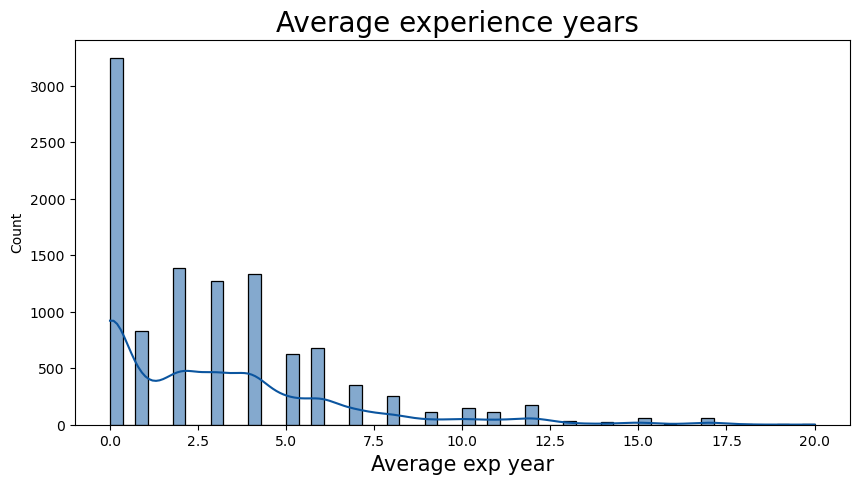

In [45]:
 fig, ax = plt.subplots(figsize = (10,5))
df['ave_exp_years']=pd.to_numeric(df['ave_exp_years'],errors='coerce')
sns.histplot(x=df['ave_exp_years'],kde=True)
plt.xlabel('Average exp year', fontsize = 15)
plt.title('Average experience years ', fontsize = 20)
plt.show()

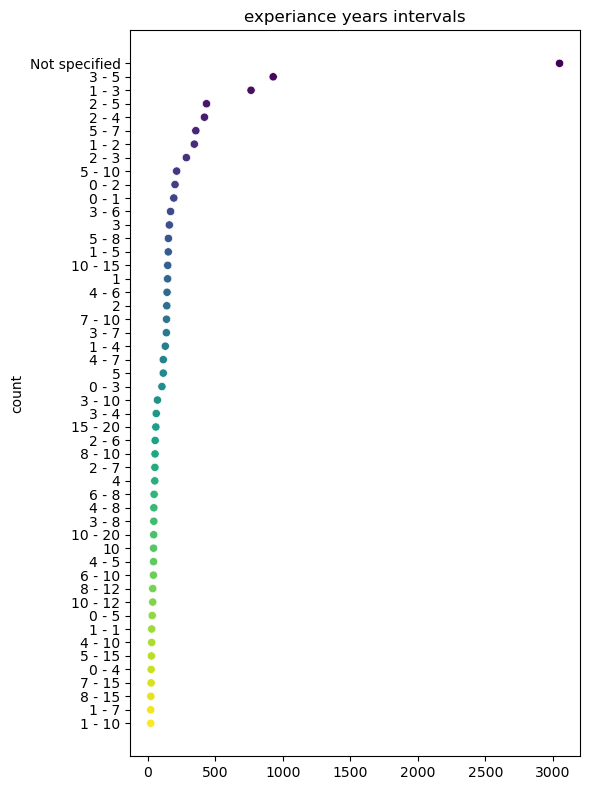

In [46]:
plt.figure(figsize=(6,8))
sns.scatterplot(y=df['exp_years'].value_counts().index[:50],x=df['exp_years'].value_counts().values[:50],c=np.arange(50))
plt.title('experiance years intervals')
plt.ylabel('count')
plt.tight_layout()
plt.show()

**The average years of experience most in demand is approximately from 2 years to 5.**

**The company that didn't specify year sof experience are the most.**

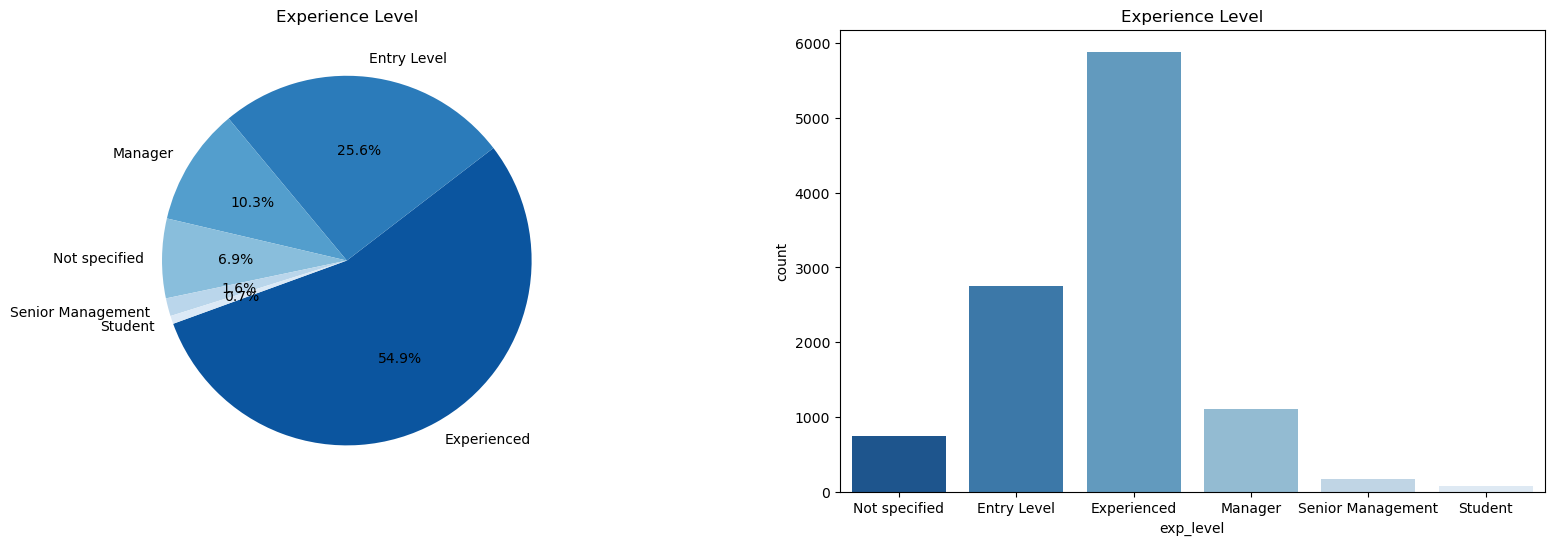

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].pie(df['exp_level'].value_counts(), labels=df['exp_level'].value_counts().index,autopct='%1.1f%%',startangle=200)
axs[0].set_title('Experience Level')

sns.countplot(x='exp_level',data=df, ax=axs[1])
axs[1].set_title('Experience Level')

plt.show()

**Companies need employees at the Experience level, their percentage is 54.9% and this is the largest percentage.**

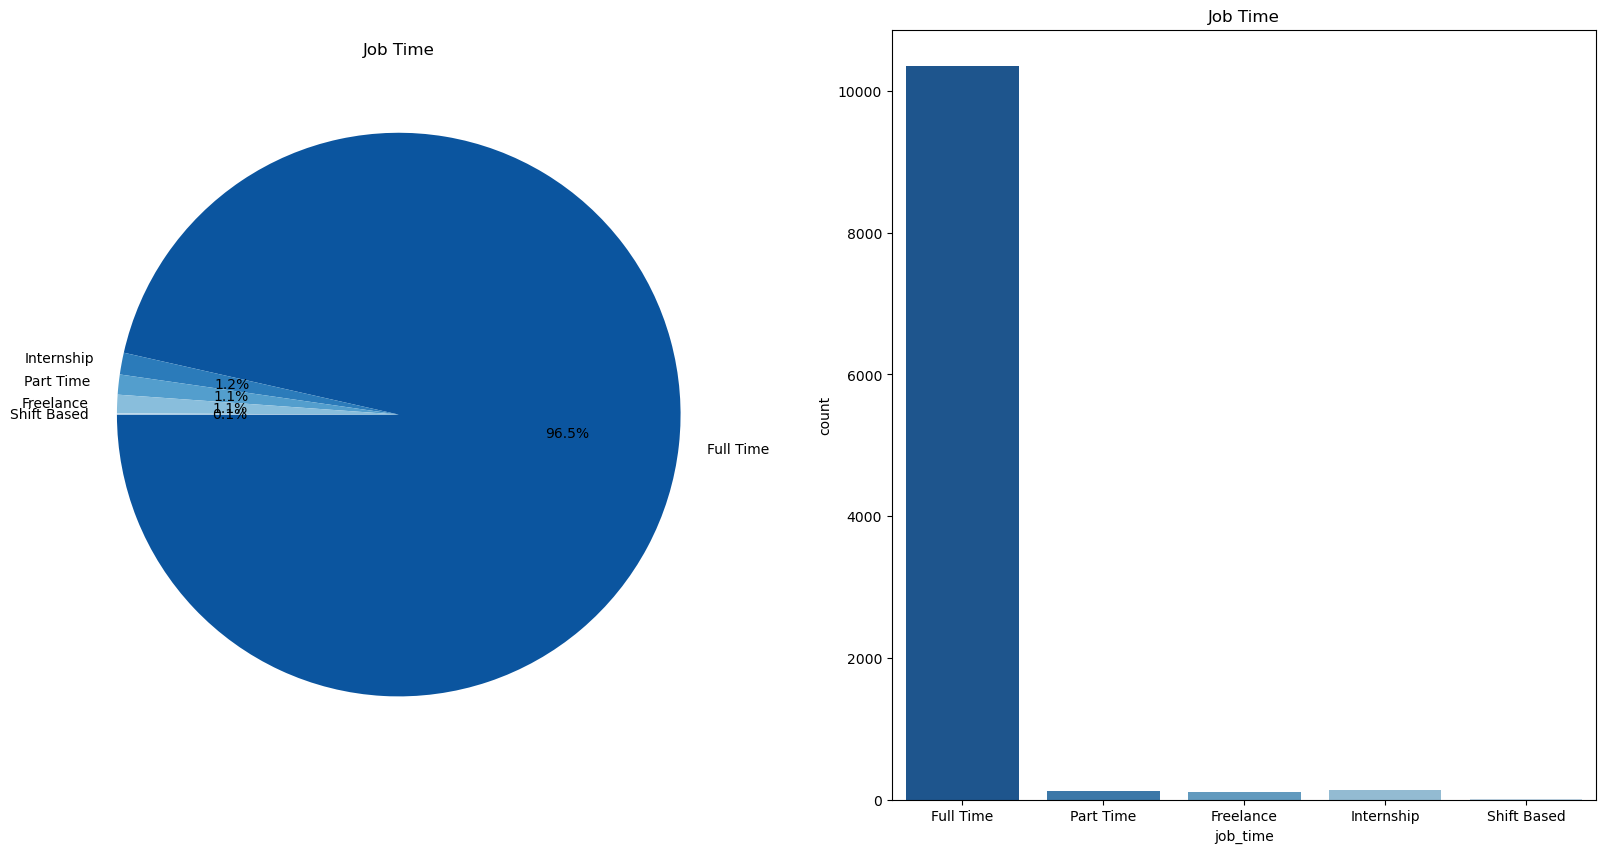

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].pie(df['job_time'].value_counts(), labels=df['job_time'].value_counts().index,autopct='%1.1f%%',startangle=180)
axs[0].set_title('Job Time')

sns.countplot(x='job_time',data=df, ax=axs[1])
axs[1].set_title('Job Time')

plt.show()

**Full time is always needed and the  rest are very small**

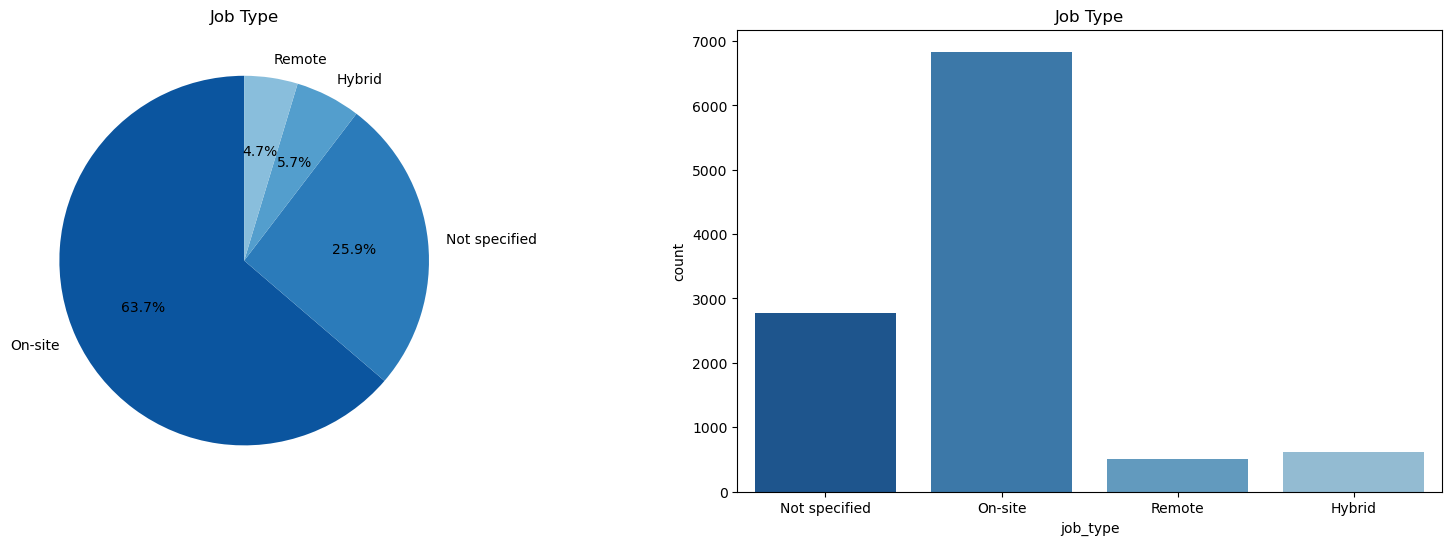

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].pie(df['job_type'].value_counts(), labels=df['job_type'].value_counts().index,autopct='%1.1f%%',startangle=90)
axs[0].set_title('Job Type')

sns.countplot(x='job_type',data=df, ax=axs[1])
axs[1].set_title('Job Type')

plt.show()

**Companies need employees to work on-site which their percentage is 63.7**



**There are companies that have not specified the place of work and thier percentage isn't small which is 25.9%**

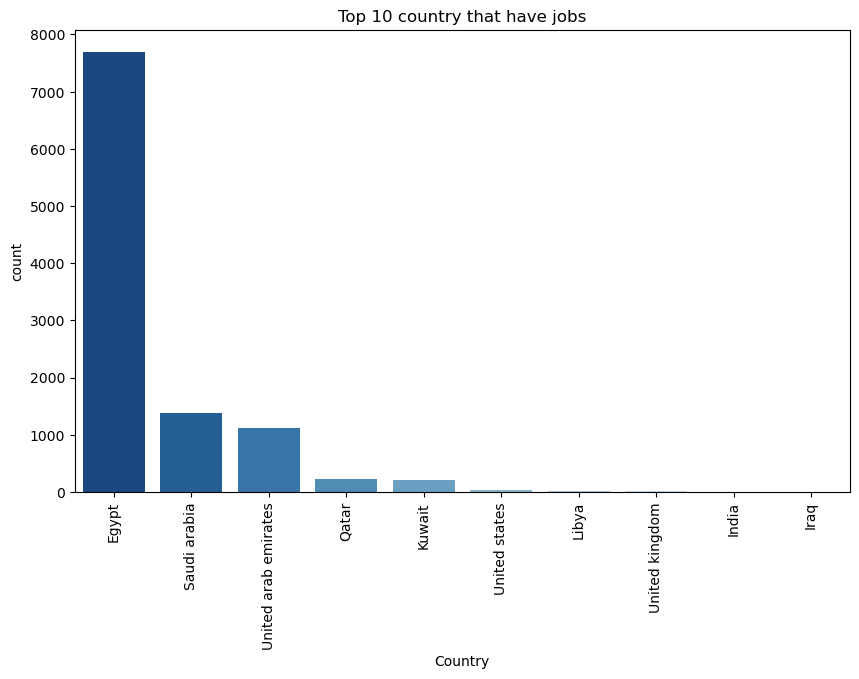

In [50]:
fig=plt.subplots(figsize = (10,6))
sns.countplot(x = 'Country', data = df, order = df['Country'].value_counts()[:10].index,palette='Blues_r')
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Top 10 country that have jobs')
plt.show()

**The most country have jobs is Egypt.**

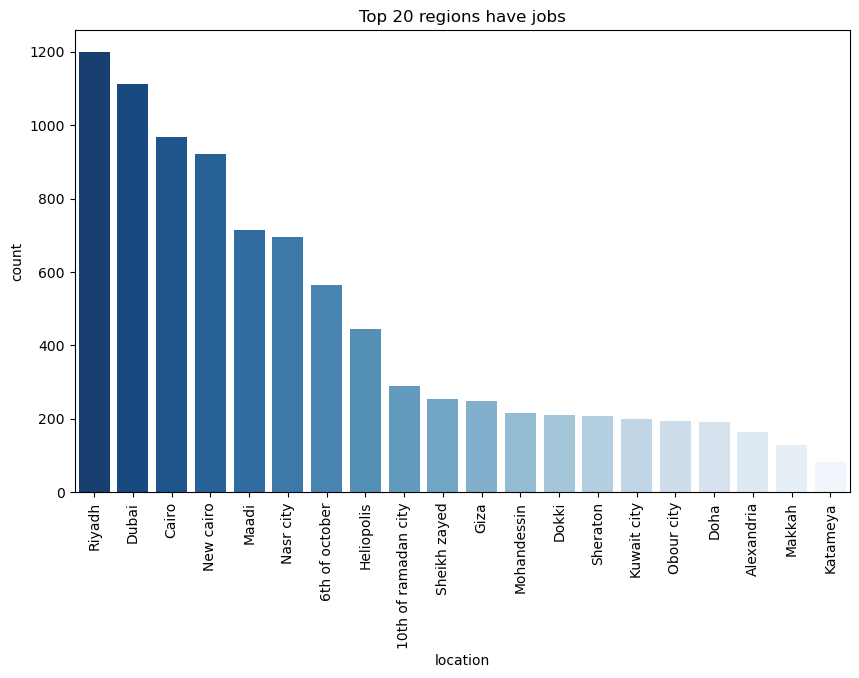

In [51]:
fig=plt.subplots(figsize = (10,6))
sns.countplot(x = 'location', data = df, order = df['location'].value_counts()[:20].index,palette="Blues_r")
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Top 20 regions have jobs')
plt.show()

**Riyadh is the most region has jobs**

In [52]:
df2=df.copy()
df2['skills']=df2['skills'].str.split(',')
df2 = df2.explode('skills')
df2
# i will split every skill alone to know what is the most skill is important and the companies ask for it a lot of time

,job_name,company_name,location,job_type,job_time,Country,exp_level,exp_years,skills,ave_exp_years
0,Team leader survey,Alqotr,Riyadh,Not specified,Full Time,Saudi arabia,Not specified,Not specified,IT,0
0,Team leader survey,Alqotr,Riyadh,Not specified,Full Time,Saudi arabia,Not specified,Not specified,Software Development Sales,0
0,Team leader survey,Alqotr,Riyadh,Not specified,Full Time,Saudi arabia,Not specified,Not specified,Retail Engineering - Telecom,0
0,Team leader survey,Alqotr,Riyadh,Not specified,Full Time,Saudi arabia,Not specified,Not specified,Technology Sales Sales Skills Sales Target Inf...,0
1,Engineer,Confidential,Sheikh zayed,On-site,Full Time,Egypt,Entry Level,1 - 4,Engineering - Construction,2
...,...,...,...,...,...,...,...,...,...,...
10726,Call Center Advisor II B1+ English Speakers,Etisalat egypt,Cairo,On-site,Full Time,Egypt,Entry Level,0 - 1,Support English Benefits excel Excellent engli...,0
10727,Steel production manager,Egyptian contracting centre,6th of october,Hybrid,Full Time,Egypt,Manager,10 - 15,Engineering - Construction,12
10727,Steel production manager,Egyptian contracting centre,6th of october,Hybrid,Full Time,Egypt,Manager,10 - 15,Civil,12
10727,Steel production manager,Egyptian contracting centre,6th of october,Hybrid,Full Time,Egypt,Manager,10 - 15,Architecture Manufacturing,12


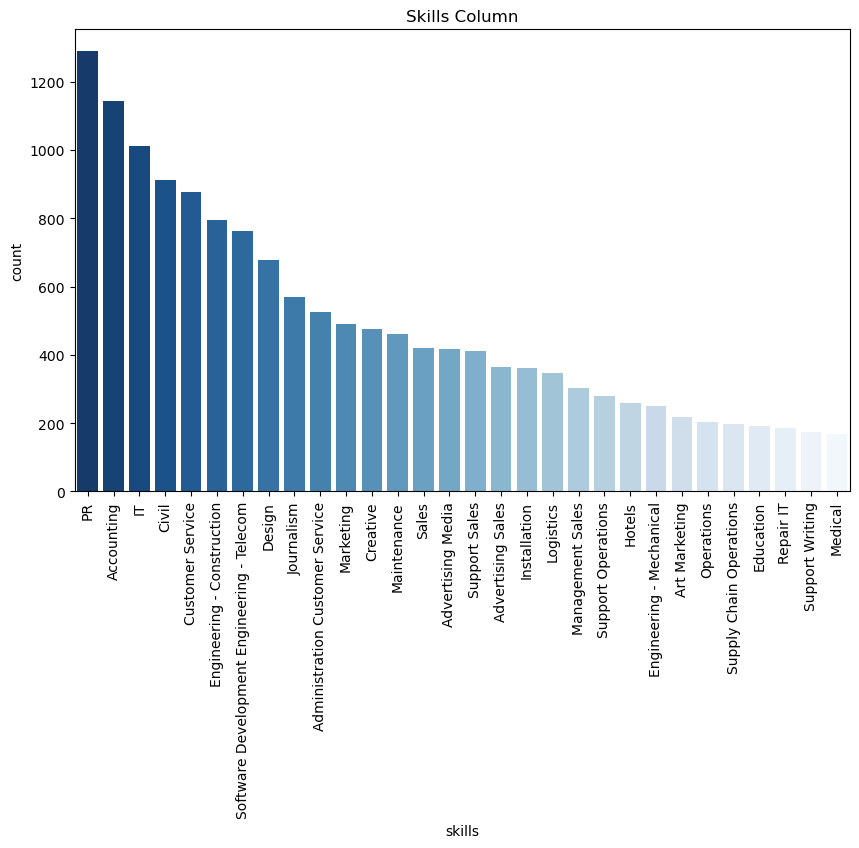

In [53]:
fig=plt.subplots(figsize = (10,6))
sns.countplot(x = 'skills', data = df2, order = df2['skills'].value_counts()[:30].index,palette='Blues_r')
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Skills Column')
plt.show()

**PR and accounting are the most skills that Companies are looking for it**

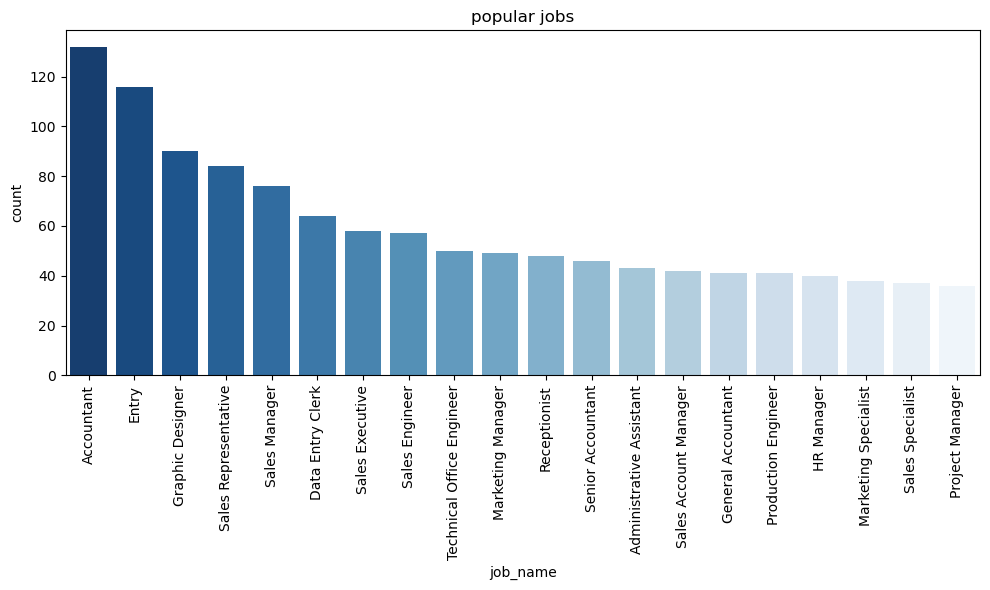

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'job_name', data = df, order = df['job_name'].value_counts()[:20].index,palette="Blues_r")
plt.title('popular jobs')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Accountant is the popular job name**

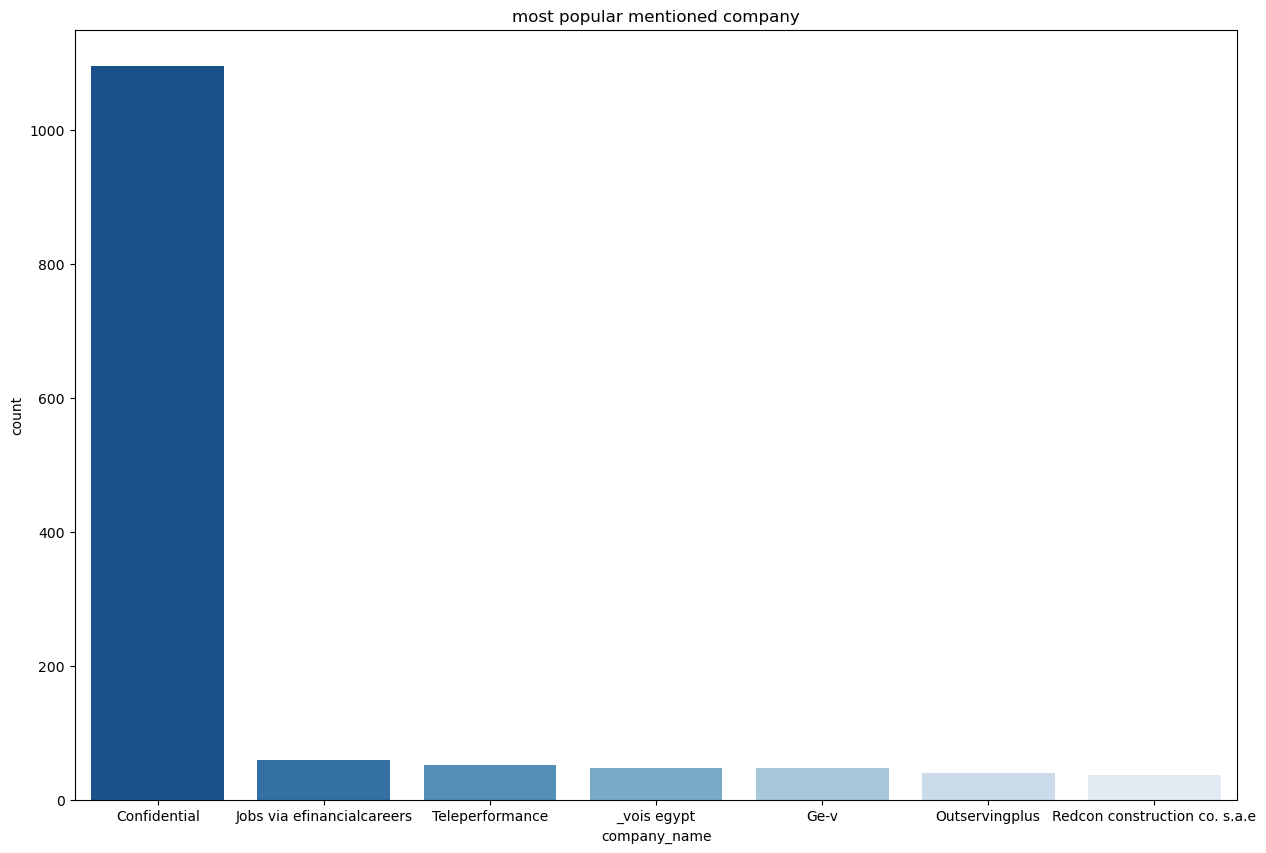

In [55]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'company_name', data = df, order = df['company_name'].value_counts()[:7].index,palette="Blues_r")
plt.title('most popular mentioned company')
plt.ylabel('count')
plt.show()


**Confidential is the most company offering job**

## Bivariate Analysis

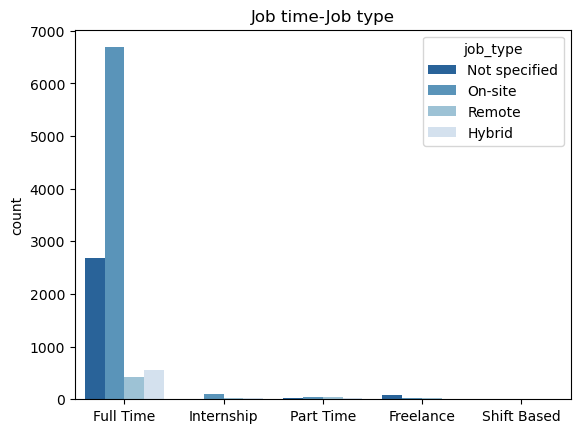

In [56]:
sns.countplot(x='job_time',data=df,order=df['job_time'].value_counts().index,hue='job_type',palette='Blues_r')
plt.title("Job time-Job type")
plt.xlabel('')
plt.show()

**Most companies are looking for On-Site and full time employee**

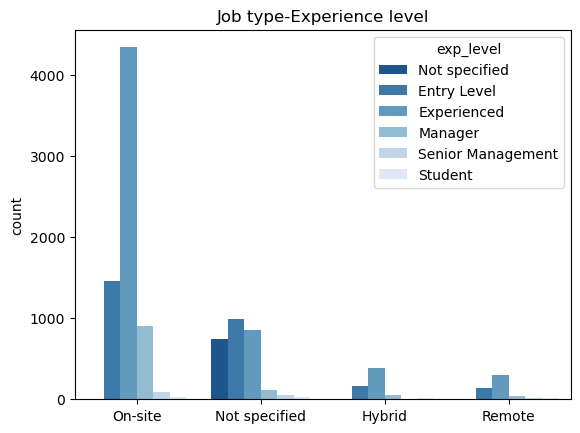

In [57]:
sns.countplot(x='job_type',data=df,order=df['job_type'].value_counts().index,hue="exp_level",palette='Blues_r')
plt.title("Job type-Experience level")
plt.xlabel('')
plt.show()

**The most company tha request employee in On-site require Experienced level**

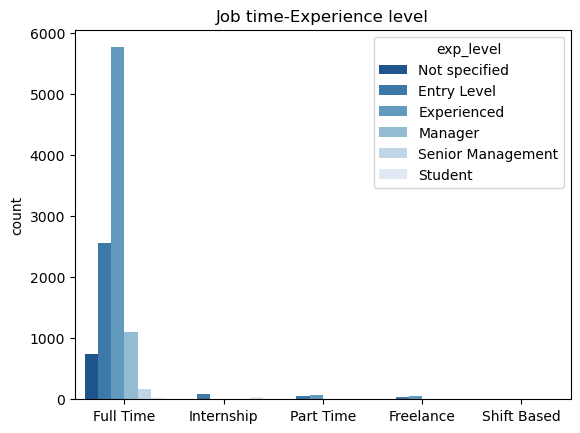

In [58]:
sns.countplot(x='job_time',data=df,order=df['job_time'].value_counts().index,hue='exp_level',palette='Blues_r')
plt.title("Job time-Experience level")
plt.xlabel('')
plt.show()

**The eperience level is the most needed with full time job**

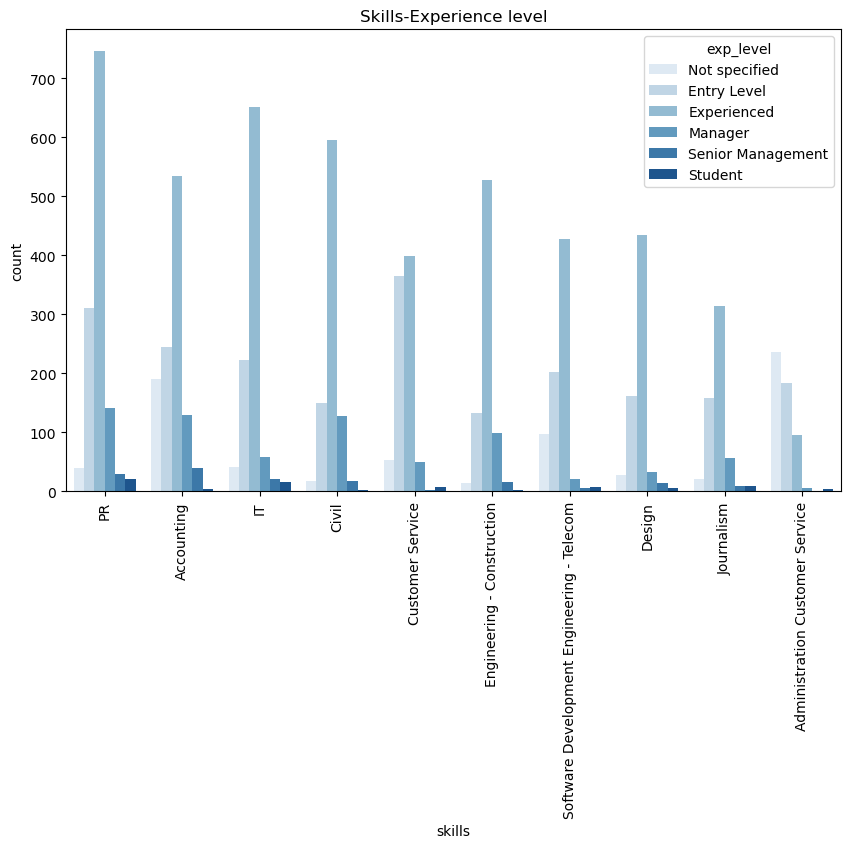

In [59]:
fig=plt.subplots(figsize = (10,6))
sns.countplot(x ='skills', data = df2, order = df2['skills'].value_counts()[:10].index,hue='exp_level',palette='Blues')
plt.title('Skills-Experience level')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

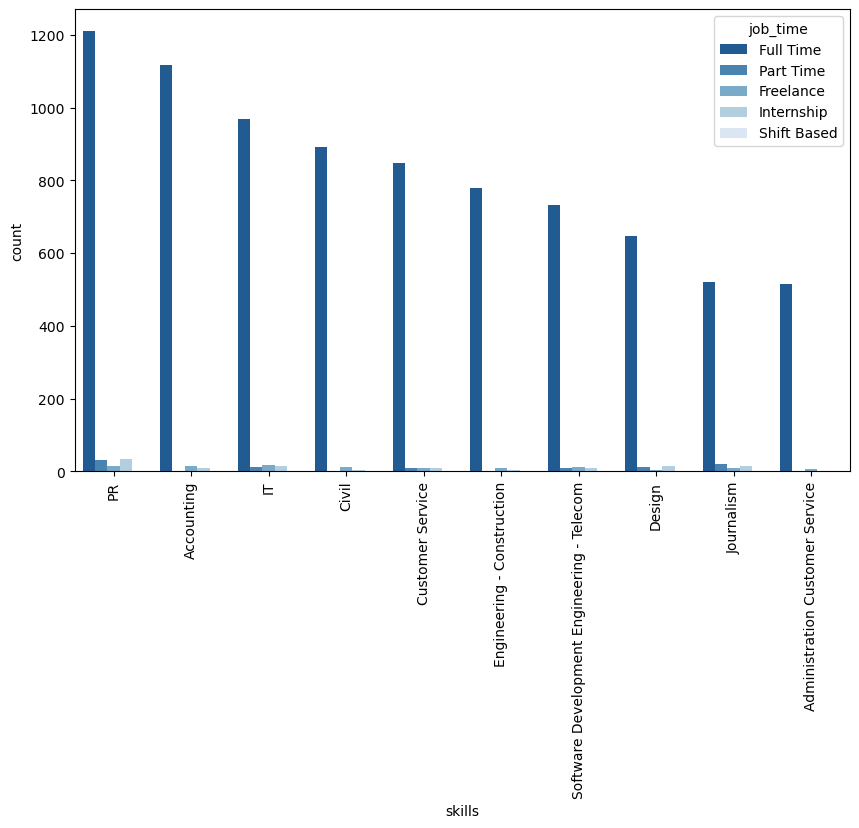

In [60]:
fig=plt.subplots(figsize = (10,6))
sns.countplot(x = 'skills', data = df2, order = df2['skills'].value_counts()[:10].index,hue='job_time',palette='Blues_r')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

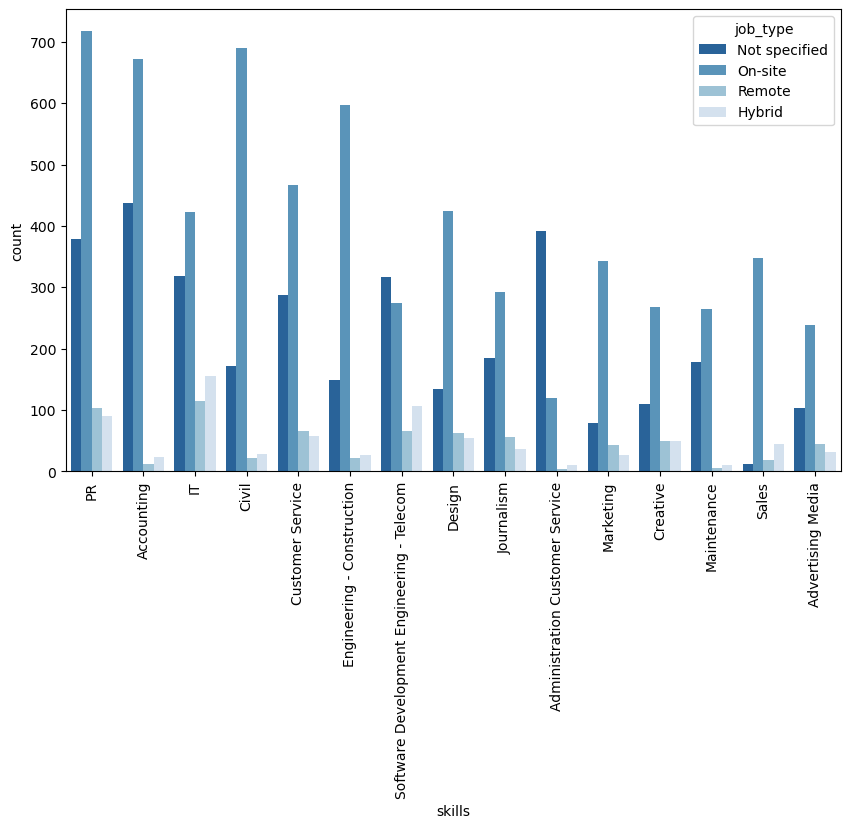

In [61]:
fig=plt.subplots(figsize = (10,6))
sns.countplot(x = 'skills', data = df2, order = df2['skills'].value_counts()[:15].index,palette='Blues_r',hue='job_type')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

**The most companies need PR skill and Looking for a free person beacuase it is always need full time job and On-site**